# Cell type classification using single cell RNAseq data from the human mammary gland.

The human mammary gland consists of two main types of epithelial cells: luminal epithelial cells which are responsible for producing milk and myoepithelial cells which are contractile and responsible for expelling milk. I used this dataset consisting of 22 luminal epithelial cells and 64 myoepithelial cells as a practice case for developing a machine learning algorithm. My main questions are whether or not a machine learning algorithm can classify the cells, and whether I can develop a list of biologically interesting candidate genes that the algorithm uses to classify the two cell types.

Single cell RNAseq data was acquired using a plate based method in my lab. Preproccessing was done in R according to simpleSingleCell's recommended workflow (https://www.bioconductor.org/help/workflows/simpleSingleCell/). Left with: 12799 features (genes) and 86 samples (cells)

1. Import modules and data

2. Dimensionality reduction/ Data visualization: 
    - Info here: https://academic.oup.com/bioinformatics/article/23/19/2507/185254/A-review-of-feature-selection-techniques-in
    - Follow sci kit learn's feature selection suggestions http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection
    
    - Try PCA for dimensionality reduction
    - Rule of thumb is ~10x # of cases per feature? So 9 or 10 features?

3. Algorithms & Cross Validation

4. Feature Selection

5. Write Concluding Statement

## 1. Import Modules and Data

In [327]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#line to make our figures show up in notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [326]:
seq=pd.read_csv('MEPLEP_data.csv', index_col=False)
seq.shape

(86, 12825)

In [328]:
seq.head()

,class,WASH7P,LOC729737,LOC100133331,MIR6723,LOC100288069,LINC01128,FAM41C,SAMD11,NOC2L,...,pct_counts_top_500_features,pct_counts_top_50_endogenous_features,pct_counts_top_100_endogenous_features,pct_counts_top_200_endogenous_features,pct_counts_top_500_endogenous_features,counts_endogenous_features,log10_counts_feature_controls,log10_counts_endogenous_features,is_cell_control,size_factor
0,LEP,0.000000,0.0,0.000000,5.620890,0.000000,2.602831,0.0,0.000000,0.000000,...,59.920095,25.498966,34.030442,45.135857,59.920095,56567,0,4.752571,False,0.394106
1,LEP,0.822186,0.0,0.468887,5.368921,0.468887,1.724323,0.0,0.822186,1.882953,...,57.172046,21.586971,30.645065,42.182290,57.172046,367064,0,5.564743,False,2.603884
2,MEP,2.178944,0.0,0.000000,6.450244,0.000000,0.000000,0.0,0.000000,1.466815,...,64.501230,30.673454,40.591534,51.959231,64.501230,88989,0,4.949341,False,0.566858
3,MEP,0.000000,0.0,0.000000,5.997364,0.000000,0.000000,0.0,2.376349,3.763054,...,55.727239,22.824057,31.157673,41.488097,55.727239,29447,0,4.469056,False,0.238538
4,MEP,1.353904,0.0,0.000000,5.982791,0.000000,1.353904,0.0,2.039860,3.369630,...,58.866590,26.260383,34.758122,45.135812,58.866590,88247,0,4.945705,False,0.642662


In [329]:
seq=seq.drop(seq.columns[range(12800,12825)], axis=1)
seq_noLabel=seq.drop('class', axis=1)
seq_noLabel.head()

,WASH7P,LOC729737,LOC100133331,MIR6723,LOC100288069,LINC01128,FAM41C,SAMD11,NOC2L,ISG15,...,CMC4,BRCC3,VBP1,TMLHE,VAMP7,PCDH11Y,PRKY,TTTY15,UTY,CD24
0,0.000000,0.0,0.000000,5.620890,0.000000,2.602831,0.0,0.000000,0.000000,6.009765,...,2.602831,3.478913,3.478913,0.000000,0.000000,2.602831,0.000000,0.000000,1.822684,7.352200
1,0.822186,0.0,0.468887,5.368921,0.468887,1.724323,0.0,0.822186,1.882953,5.228202,...,2.672784,1.105762,4.587515,1.342650,2.583168,2.385282,1.342650,0.468887,1.342650,7.168557
2,2.178944,0.0,0.000000,6.450244,0.000000,0.000000,0.0,0.000000,1.466815,0.000000,...,1.466815,1.466815,3.010143,0.000000,3.534144,4.076986,1.466815,0.000000,1.466815,6.739397
3,0.000000,0.0,0.000000,5.997364,0.000000,0.000000,0.0,2.376349,3.763054,0.000000,...,0.000000,3.230268,5.110099,0.000000,2.376349,0.000000,0.000000,0.000000,0.000000,2.376349
4,1.353904,0.0,0.000000,5.982791,0.000000,1.353904,0.0,2.039860,3.369630,0.000000,...,2.502861,2.039860,4.298097,3.134244,2.502861,2.039860,0.000000,2.039860,0.000000,4.049655


LEP=0; MEP=1

In [330]:
seq_Labels=pd.read_csv('Labels_2samples_cur.csv', header=None)
seq_Labels.shape

(86, 1)

In [331]:
X_PCA=seq_noLabel.as_matrix()
y_PCA=seq_Labels.as_matrix()
target_names = np.array(['LEP', 'MEP'])

# 1.5 train test split

In [332]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test=train_test_split(seq_noLabel, seq_Labels)
X_train.shape

(64, 12799)

In [333]:
X_test.shape

(22, 12799)

# 2. Visualize Data / think about dimensionality reduction with PCA and tSNE visualizations
code from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py and http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

### Overall, it seems like there might be a weak 'plane of separation' between meps and leps, most visible in 3D tSNE?
### It might be that I still have a lot of noise/low dispersion genes and tSNE will get a lot better when I pick a set of determining features / do feature elimination.

### 3D PCA

Automatically created module for IPython interactive environment
explained variance ratio (first three components): [ 0.11  0.05  0.03]


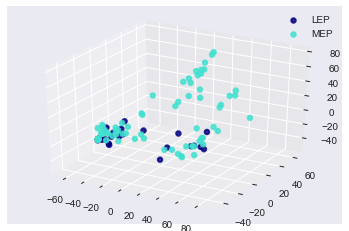

In [334]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
X_r = pca.fit(X_PCA).transform(X_PCA)

# Percentage of variance explained for each components
print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_r[np.where(y_PCA == i), 0], 
               X_r[np.where(y_PCA == i), 2],
               X_r[np.where(y_PCA == i), 1],
               zdir="x",
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
#ax.title('PCA of scRNAseq dataset')

### 2D PCA

explained variance ratio (first two components): [ 0.11  0.05]


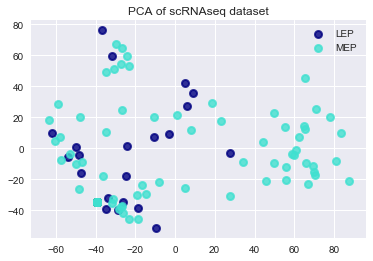

In [335]:
pca = PCA(n_components=2)
X_r = pca.fit(X_PCA).transform(X_PCA)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[np.where(y_PCA == i), 0], 
               X_r[np.where(y_PCA == i), 1],
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of scRNAseq dataset')

PCA analysis shows no obvious separation between LEPs and MEPs

### tSNE visualization
this orignially threw an error about no NaNs or inf's allowed (there are none) but google says it has something to do with optimization on small datasets and/or my CPU and version of python or conda or something... to fix it i just lowered the learning rate so that the gradient descent wouldn't get to inf so fast. I think it worked because with a low sample number it was able to converge fast enough.

t-distributed stochastic neighbor embedding is all the rage for visualizing high-dimensional data. It's like a non-linear version of PCA that's better at pulling clusters out. It preserves 'closeness' of neighbors in higher dimensional space but projects them non linearly into 2D. So you can't infer anything from placement of clusters of dots, but you can infer that dots within a cluster are similar to each other in higher dimensional space.

This iris example shows a comparison between tSNE and PCA: http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

In this case, it appears that my cells are all actually more similar than different. This makes sense because they come from the same woman and same organ (breast) but they should have some dominant molecular characteristics (expression of marker genes, expression of gene modules controlling their different functions) that I can hopefully harness in a classifier.

In [336]:
from sklearn.manifold import TSNE

In [337]:
X_tsne = TSNE(n_components=3, learning_rate=20, perplexity=5).fit_transform(X_PCA)

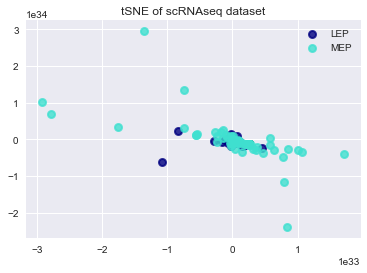

In [338]:
ffig = plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_tsne[np.where(y_PCA == i), 1], 
               X_tsne[np.where(y_PCA == i), 0],
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('tSNE of scRNAseq dataset')

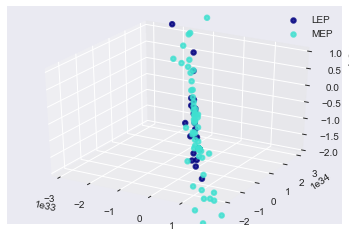

In [339]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_tsne[np.where(y_PCA == i), 1], 
               X_tsne[np.where(y_PCA == i), 0],
               X_tsne[np.where(y_PCA == i), 2],
               zdir="x",
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)

### TruncatedSVD (LSA)

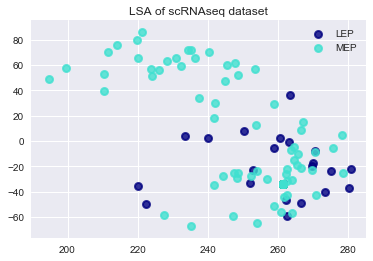

In [340]:
from sklearn.decomposition import TruncatedSVD
X_lsa = TruncatedSVD(n_iter=100).fit_transform(X_PCA)

ffig = plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_lsa[np.where(y_PCA == i), 0], 
               X_lsa[np.where(y_PCA == i), 1],
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LSA of scRNAseq dataset')

## Exploring dimensionality reduction with tSVD

Variance preserved by first 86 components == 100.00%
Variance preserved by first 50 components == 78.88%


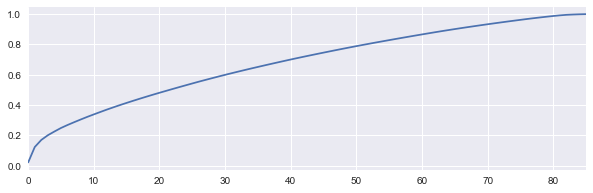

In [450]:
#from: http://blog.applied.ai/visualising-high-dimensional-data/
ncomps = 86
X_svd = TruncatedSVD(n_components=ncomps)
svd_fit =X_svd.fit(X_PCA)
y_svd =X_svd.fit_transform(X_PCA) 
ax = pd.Series(svd_fit.explained_variance_ratio_.cumsum()).plot(kind='line', figsize=(10,3))
print('Variance preserved by first 86 components == {:.2%}'.format(
        svd_fit.explained_variance_ratio_.cumsum()[-1]))
print('Variance preserved by first 50 components == {:.2%}'.format(
        svd_fit.explained_variance_ratio_.cumsum()[50]))

My data has a lot of variance in many dimensions. Need 86 to preserve 100% of the variance.

In [342]:
dfsvd = pd.DataFrame(y_svd, columns=['c{}'.format(c) for c in range(ncomps)], index=seq.index)
print(dfsvd.shape)
dfsvd.head()

(86, 86)


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85
0,261.265024,-33.827460,-38.120313,17.385583,-12.069261,0.079428,-0.456788,-9.959712,-0.824236,7.517206,...,2.214467,2.728866,0.854809,-6.475915,-0.406961,-3.322640,0.231110,-0.341848,-1.208410,-0.014335
1,280.272255,-36.709710,-10.595257,-4.601388,-12.396759,14.287124,-0.746594,-2.718383,3.238623,5.264943,...,-4.506555,-9.315032,-10.967378,20.597290,-1.020862,73.353944,2.763824,-0.550239,-0.950612,0.228204
2,262.408341,-21.943567,-41.556837,6.627200,17.236181,-21.096879,-16.559567,13.932898,9.870254,-10.957248,...,7.844520,-0.259993,-2.450489,-5.645243,-8.350633,1.338660,0.770254,0.037323,-0.814486,-0.038160
3,235.202555,-66.867809,12.091370,-37.882728,7.753335,-22.533568,26.505284,13.838414,-2.182304,-4.042832,...,-1.982012,-1.951182,-0.622376,2.934219,1.643557,1.248279,-1.914573,-0.159679,-0.014554,-0.017704
4,258.886760,-50.944467,-9.337058,-18.684192,5.233099,-12.320247,-7.723500,15.493517,-1.683391,2.386192,...,6.717106,1.799425,4.191414,-1.821605,2.124703,-4.265802,-0.541985,-0.072397,-0.094714,0.015968


In [343]:
svdcols = [c for c in dfsvd.columns if c[0] == 'c']

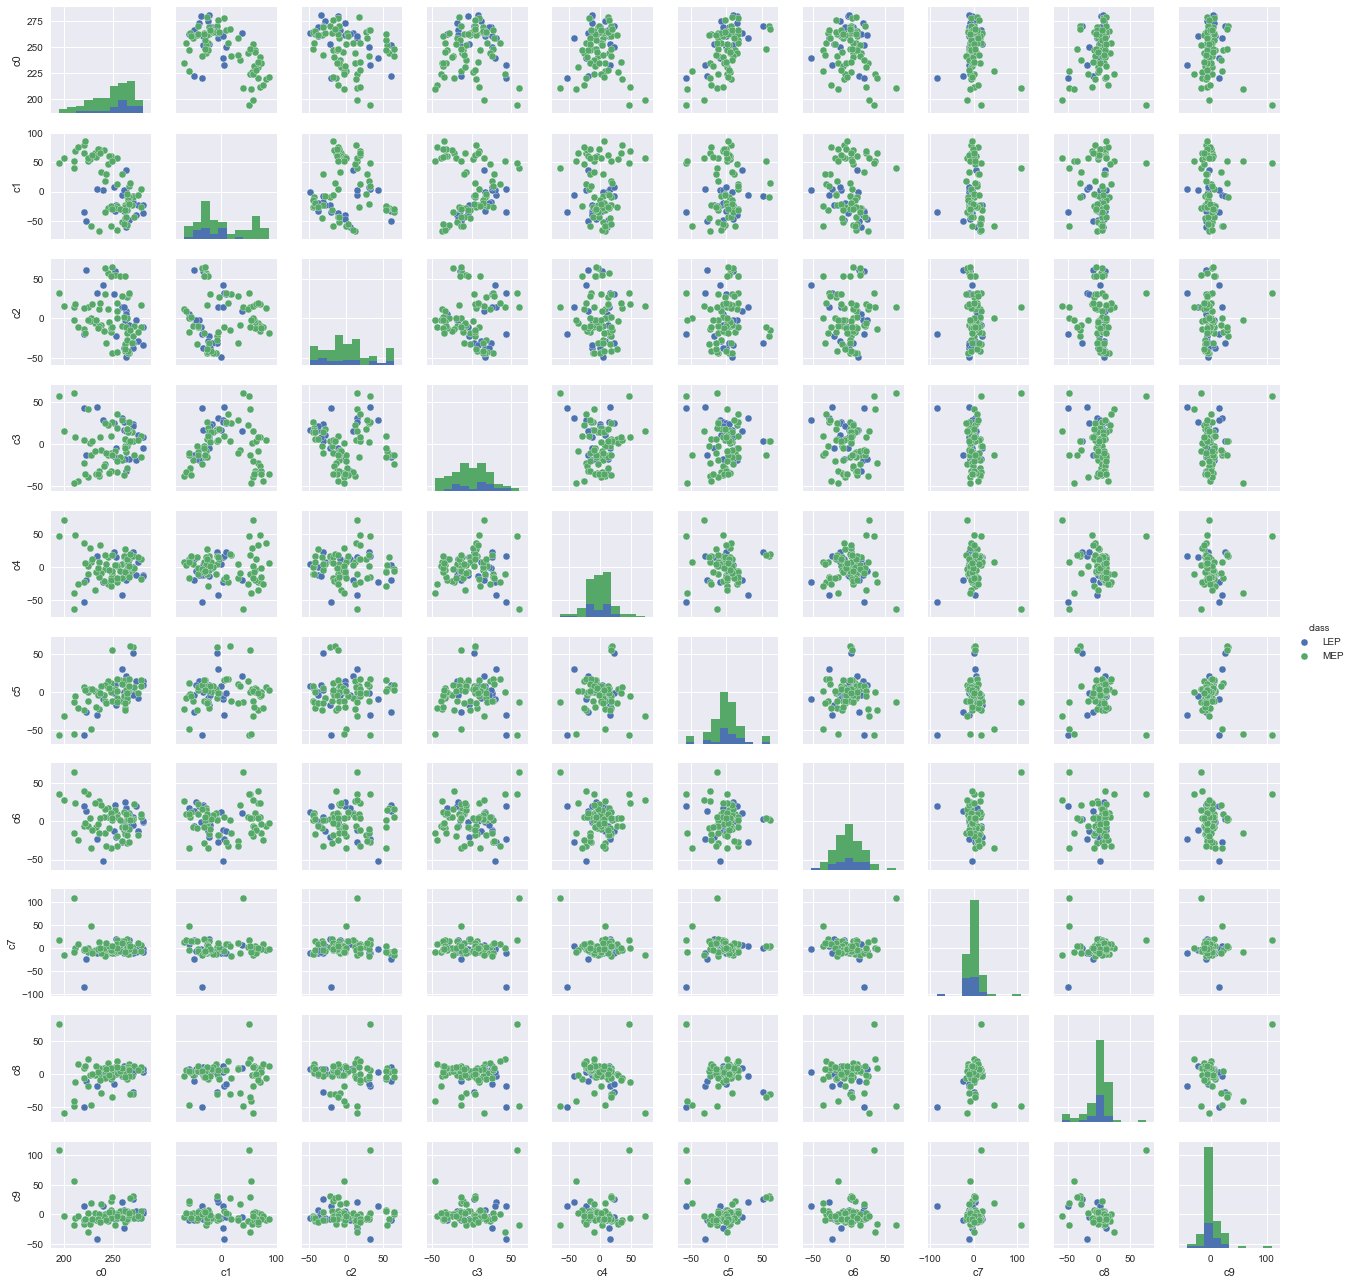

In [344]:
plotdimslow = 0
plotdimshi = 10
ploteorows = 1
dfsvdplot = dfsvd[svdcols].iloc[:,plotdimslow:plotdimshi]
dfsvdplot['class'] = seq['class']
ax = sns.pairplot(dfsvdplot.iloc[::ploteorows,:], hue='class',size=1.8)

The first ten LSA dimensions don't show a lot of variance between the two groups.

## 3. Algorithms
### Logistic Regression

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [346]:
logreg=LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
logreg.intercept_ #bias 
logreg.coef_

array([[-0.,  0.,  0., ..., -0., -0., -0.]])

In [349]:
print('Logistic Regression')
print(metrics.classification_report(y_test, y_pred))

Logistic Regression
             precision    recall  f1-score   support

          0       0.67      0.40      0.50         5
          1       0.84      0.94      0.89        17

avg / total       0.80      0.82      0.80        22



Confusion matrix, without normalization
[[ 2  3]
 [ 1 16]]


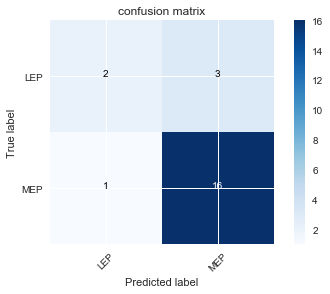

In [434]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    (http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

In [437]:
from sklearn.linear_model import LogisticRegressionCV
searchCV = LogisticRegressionCV()
searchCV.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [449]:
y_pred_searchCV=searchCV.predict(X_test)
print('Logistic Regression CV')
print(metrics.classification_report(y_test, y_pred_searchCV))

Logistic Regression CV
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.77      1.00      0.87        17

avg / total       0.60      0.77      0.67        22



## k-Nearest Neighbor Classifier
unbalanced data: use 'uniform' weights 

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn=KNeighborsClassifier(weights='uniform')
knn.fit(X_train, y_train)

/Users/paulson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [90]:
y_pred_knn=knn.predict(X_test)

In [350]:
print("kNN")
print(metrics.classification_report(y_test, y_pred_knn))

kNN
             precision    recall  f1-score   support

          0       0.14      0.20      0.17         5
          1       0.73      0.65      0.69        17

avg / total       0.60      0.55      0.57        22



Confusion matrix, without normalization
[[ 1  4]
 [ 6 11]]


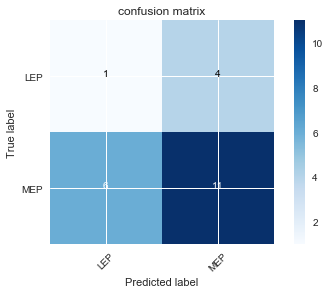

In [351]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

## k-Nearest Neighbor Classifier with Cross Validation (no more error)

In [352]:
from sklearn.model_selection import cross_val_score

In [366]:
knn_cv=KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
cv_scores=cross_val_score(knn_cv, X_train, y_train[0], cv=10) #pass a single column from pd frame to cross val
print("Neighbors:  1 Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

knn_cv=KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
cv_scores=cross_val_score(knn_cv, X_train, y_train[0], cv=10) #pass a single column from pd frame to cross val
print("Neighbors:  5 Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

knn_cv=KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
cv_scores=cross_val_score(knn_cv, X_train, y_train[0], cv=10) #pass a single column from pd frame to cross val
print("Neighbors: 10 Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

knn_cv=KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')
cv_scores=cross_val_score(knn_cv, X_train, y_train[0], cv=10) #pass a single column from pd frame to cross val
print("Neighbors: 15 Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

knn_cv=KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')
cv_scores=cross_val_score(knn_cv, X_train, y_train[0], cv=10) #pass a single column from pd frame to cross val
print("Neighbors: 19 Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

knn_cv=KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')
cv_scores=cross_val_score(knn_cv, X_train, y_train[0], cv=10) #pass a single column from pd frame to cross val
print("Neighbors: 25 Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Neighbors:  1 Accuracy: 0.53 (+/- 0.30)
Neighbors:  5 Accuracy: 0.60 (+/- 0.26)
Neighbors: 10 Accuracy: 0.71 (+/- 0.31)
Neighbors: 15 Accuracy: 0.73 (+/- 0.13)
Neighbors: 19 Accuracy: 0.74 (+/- 0.08)
Neighbors: 25 Accuracy: 0.74 (+/- 0.08)


I used this cross validation to optimize various parameters by hand: n_neighbors seems to have the biggest effect and 19 is the lowest number that achieves an optimization accuracy plateau.

In [370]:
knn_cv=KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')
knn_cv.fit(X_train, y_train)
y_pred_knn_cv=knn_cv.predict(X_test)

/Users/paulson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [371]:
print("kNN w/ CV")
print(metrics.classification_report(y_test, y_pred_knn_cv))

kNN w/ CV
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.77      1.00      0.87        17

avg / total       0.60      0.77      0.67        22



/Users/paulson/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[ 0  5]
 [ 0 17]]


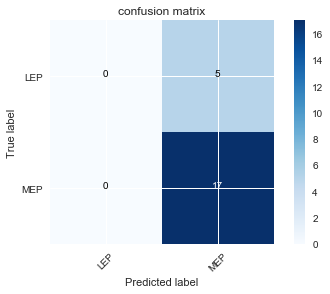

In [372]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_knn_cv)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

### BUT this does much worse for classifying LEPs than default settings above. Optimizing on accuracy alone won't work for this unbalanced data...

## SVM

In [373]:
from sklearn import svm

In [374]:
sv=svm.SVC(kernel="linear", class_weight='balanced')
sv.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [375]:
y_pred_sv=sv.predict(X_test)

In [378]:
print("SVM")
print(metrics.classification_report(y_test, y_pred_sv))

SVM
             precision    recall  f1-score   support

          0       0.33      0.20      0.25         5
          1       0.79      0.88      0.83        17

avg / total       0.69      0.73      0.70        22



Confusion matrix, without normalization
[[ 1  4]
 [ 2 15]]


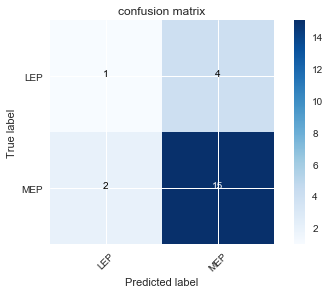

In [379]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_sv)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

# Combine SVM with ANOVA to improve classification:
http://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py

In [380]:
from sklearn.pipeline import Pipeline
from sklearn import feature_selection

transform = feature_selection.SelectPercentile(feature_selection.f_classif)

clf = Pipeline([('anova', transform), ('svc', svm.SVC(kernel="linear", class_weight='balanced'))])

/Users/paulson/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [5177 6869 8861 9247 9605] are constant.
  UserWarning)
/Users/paulson/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 7676 11240] are constant.
  UserWarning)


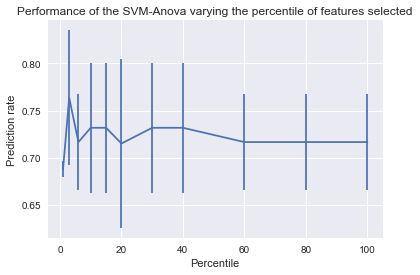

In [381]:
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X_train, y_train[0], n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

In [382]:
score_means

[0.68787878787878787,
 0.76363636363636367,
 0.71666666666666667,
 0.73181818181818181,
 0.73181818181818181,
 0.7151515151515152,
 0.73181818181818181,
 0.73181818181818181,
 0.71666666666666667,
 0.71666666666666667,
 0.71666666666666667]

ANOVA doesn't help in any apparent way.

# Nested CV (best practice for hyperparameter tuning)
http://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py

In [383]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Set up possible values of parameters to optimize over
p_grid = {"kernel":["sigmoid", "linear", "poly", "rbf"], "C": [0.1, 1, 10], "gamma":[.1,1,10,100]}

# We will use a Support Vector Classifier with "rbf" kernel
svr = svm.SVC(class_weight='balanced')

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

# Non_nested parameter search and scoring
clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv)



In [387]:
clf.fit(X_train, y_train)
print(clf.best_estimator_)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [388]:
nested_score

array([ 0.69,  0.81,  0.62,  0.75])

In [389]:
y_pred_clf=clf.predict(X_test)

0.77272727272727271

In [390]:
print("Grid Search")
print(metrics.classification_report(y_test, y_pred_clf))

Grid Search
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.77      1.00      0.87        17

avg / total       0.60      0.77      0.67        22



Confusion matrix, without normalization
[[ 0  5]
 [ 0 17]]


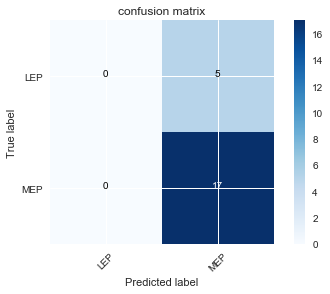

In [391]:
metrics.confusion_matrix(y_test, y_pred_clf)
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_clf)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

## LinearSVM

In [392]:
lsv=svm.LinearSVC(C=1, class_weight='balanced', loss='hinge')
lsv.fit(X_train, y_train)

LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [393]:
y_pred_lsv=lsv.predict(X_test)

In [396]:
print("LinearSVM")
print(metrics.classification_report(y_test, y_pred_lsv))

LinearSVM
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.76      0.94      0.84        17

avg / total       0.59      0.73      0.65        22



Confusion matrix, without normalization
[[ 0  5]
 [ 1 16]]


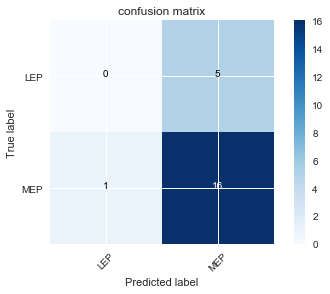

In [397]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_lsv)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

# 4. Feature Selection
## Try feature selection from (non-cross-val) SVM model

In [415]:
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(sv, prefit=True)
X_new=model.transform(X_train)
X_new.shape
X_new_test=model.transform(X_test)
X_new_test.shape

(22, 5282)

Cuts features down to about 5000 from 12k. A good start, does this new data train a model as well as the full dataset?

In [416]:
sv_new=svm.SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
sv_new.fit(X_new, y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [417]:
y_pred_sv_new=sv_new.predict(X_new_test)

In [418]:
print("Feature Selection SVM")
print(metrics.classification_report(y_test, y_pred_sv_new))

Feature Selection SVM
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.77      1.00      0.87        17

avg / total       0.60      0.77      0.67        22



Confusion matrix, without normalization
[[ 0  5]
 [ 0 17]]


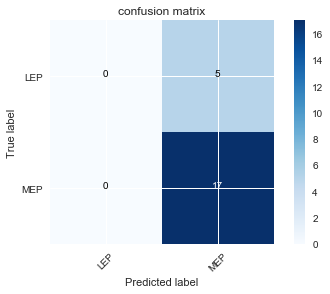

In [419]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_sv_new)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

Still the same

## Try recursive feature elimination
(change step size to 10 in order to improve speed)

In [420]:
from sklearn.feature_selection import RFE

In [425]:
# choose 1000 because that is ~ the number of highly variable genes from R preprocessing

selector=RFE(sv, 1000, step=10)
selector=selector.fit(X_new,y_train)
y_pred_selected=selector.predict(X_new_test)
print("Recursive Feature Elimination")
print(metrics.classification_report(y_test, y_pred_selected))

Recursive Feature Elimination
             precision    recall  f1-score   support

          0       0.33      0.20      0.25         5
          1       0.79      0.88      0.83        17

avg / total       0.69      0.73      0.70        22



Confusion matrix, without normalization
[[ 1  4]
 [ 2 15]]


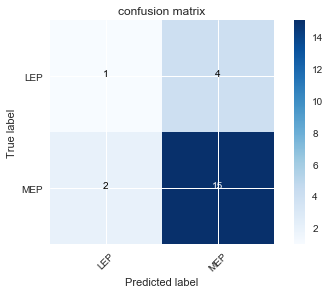

In [426]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_selected)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

In [428]:
X_new_transform=selector.transform(X_new)
X_new_transform

array([[ 3.76,  2.38,  0.  , ...,  4.15,  0.  ,  0.  ],
       [ 2.71,  3.36,  0.  , ...,  4.54,  2.23,  0.  ],
       [ 0.  ,  0.  ,  2.95, ...,  3.85,  3.47,  3.47],
       ..., 
       [ 0.  ,  2.41,  4.3 , ...,  2.41,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  3.13, ...,  4.04,  4.04,  0.  ],
       [ 1.43,  0.88,  2.13, ...,  3.1 ,  2.13,  1.82]])

In [430]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb=nb.fit(X_train, y_train)
y_pred_nb=nb.predict(X_test)
print("Naive Bayes")
print(metrics.classification_report(y_test, y_pred_nb))

Naive Bayes
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.76      0.94      0.84        17

avg / total       0.59      0.73      0.65        22



Confusion matrix, without normalization
[[ 0  5]
 [ 1 16]]


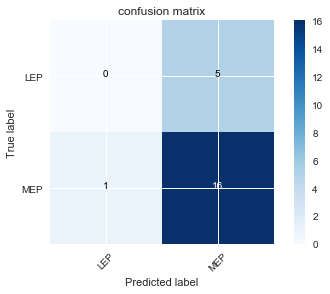

In [431]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_nb)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

In [432]:
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier()
cart=cart.fit(X_train, y_train)
y_pred_cart=cart.predict(X_test)
print("Decision Tree")
print(metrics.classification_report(y_test, y_pred_cart))

Decision Tree
             precision    recall  f1-score   support

          0       0.67      0.40      0.50         5
          1       0.84      0.94      0.89        17

avg / total       0.80      0.82      0.80        22



Confusion matrix, without normalization
[[ 2  3]
 [ 1 16]]


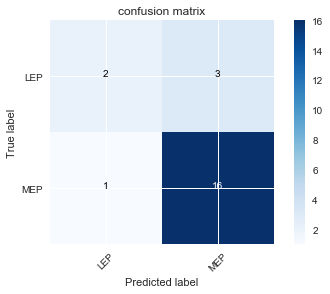

In [433]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred_cart)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

# 5. Conclusion statement

My data is hard to separate. My labels seem erroneous. Maybe the sample prep was bad or the sort was inaccurate. 